# Predicción de admisiones estudiantiles con KERAS.

## Mi primera red neuronal ?

Información de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

Debe tener instalado en el ambiente de trabajo Pandas, Keras etc.

# 1. Carga y vizualización de datos:

Para cargar los datos usamos load the data, usaremos un paquete de datos muy útil llamado Pandas. Puede leer en la documentación de Pandas aquí: https://pandas.pydata.org/


In [1]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

### Visualización de datos:

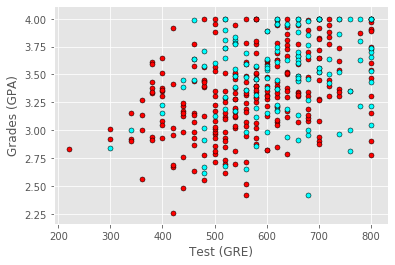

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relación clara.

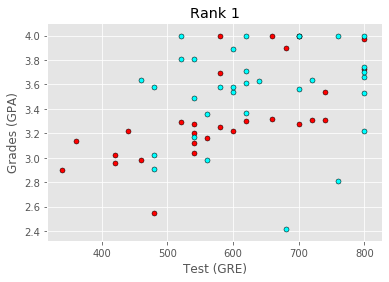

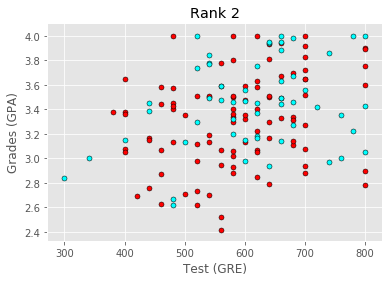

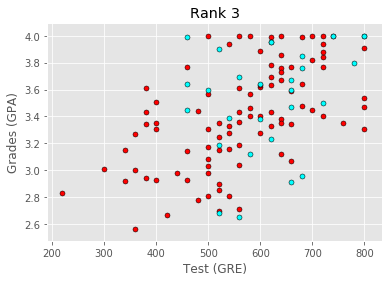

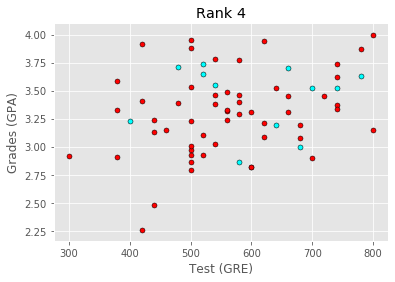

In [3]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Parece ser que por RANK la relación es un poco más clara en algunos casos, se procede a construir una MLP con RANK, GRE y GPA.

# 2. Procesado de datos:

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [4]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

Using TensorFlow backend.


In [5]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# 3. Partición de los datos en training y testing:

In [6]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


# 4. Definición de la arquitectura de la red neuronal:

In [7]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0819 00:18:10.918869  5384 deprecation_wrapper.py:119] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 00:18:10.934476  5384 deprecation_wrapper.py:119] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 00:18:10.950102  5384 deprecation_wrapper.py:119] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 00:18:10.981369  5384 deprecation_wrapper.py:119] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# 5. Entrenamiento del modelo:

In [8]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

W0819 00:18:17.877936  5384 deprecation.py:323] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 00:18:17.927507  5384 deprecation_wrapper.py:119] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



# 6. Score del modelo:

In [9]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 134us/step

 Training Accuracy: 0.7228571449007307
50/50 [==============================] - 0s 0us/step

 Testing Accuracy: 0.6600000095367432


# 7. Play with parameters!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada
- epochs? batches?



Un pequeño ejercicio agregando dropout...

In [10]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




W0819 00:18:28.673897  5384 deprecation.py:506] From C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
__________

In [11]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

In [12]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 329us/step

 Training Accuracy: 0.7200000020435878
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.6400000095367432


## Mejora en el modelo anterior (Tarea)...

Se utilizará Modelo con 3 capas ocultas (primer modelo utilizado en el archivo) para tratar de lograr una mejor precisión de resultados

**- Creación de DataFrame que almacenará valores de: Hyperparámetros, Accuracy obtenido para los Hyperparámetros utilizados.**


Columnas:

epochs = epochs

batch = batch_size

lay1_siz = layer1_size

lay1_act = layer1_activ

Drop1 = Droput layer1

lay2_siz = layer2_size

lay2_act = layer2_activ

Drop2 = Droput layer2

lay3_siz = layer3_size

lay3_act = layer3_activ

Drop3 = Droput layer3

lout_siz = layer_out_size

lout_act = layer_out_activ

loss = loss

optimizer = optimizer

test_accur = test_accur

train_accur = train_accur

In [13]:
import pandas as pd
df = pd.DataFrame(columns=('epochs', 'batch', 'lay1_siz', 'lay1_act', 'Drop1', 'lay2_siz', 'lay2_act', 'Drop2', 'lay3_siz', 'lay3_act', 'Drop3', 'lout_siz', 'lout_act', 'loss', 'optimizer', 'test_accur', 'train_accur'), index = [])

Verificación de Dataframe creado

In [14]:
df

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur


### a) Variación del Parámetro Batch_SIZE

Se evaluó el modelo anterior de forma que se variara el Hiperparámetro **Batch_size** para poder detrminar cuál valor es el que presentaba una mejor respuesta con los datos de testing y training. Estos datos se almacenaron en un archivo cvs externo, con el formato del dataset base creado anteriormente, obteniéndose los siguientes valores:

In [15]:
# Lectura del archivo csv con los datos guardados de las corridas
df_batch = pd.read_csv('https://raw.githubusercontent.com/rasalav/Tarea4/master/Tarea4_ANN_batch.csv', index_col=0)
df_batch

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
0,500,25,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.60,0.728571
1,500,50,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.64,0.720000
2,500,75,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.62,0.725714
3,500,100,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.64,0.717143
4,500,125,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.66,0.722857
5,500,150,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.66,0.722857
6,500,175,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.722857
7,500,200,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.714286
8,500,225,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.722857
9,500,250,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.66,0.720000


Parámetros empleados para el máximo valor de Testing obtenido:

In [16]:
df_batch[df_batch['test_accur'] == df_batch['test_accur'].max()]

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
6,500,175,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.722857
7,500,200,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.714286
8,500,225,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.722857
13,500,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.717143
14,500,375,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.728571
15,500,400,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.720000


Máximo valor de Training para ese valor de Testing máximo

In [17]:
df_batch['train_accur'][df_batch['test_accur'] == df_batch['test_accur'].max()].max()
#df_batch[df_batch['train_accur'] == df_batch['train_accur'].max()]

0.7285714282308307

De estos datos, se aprecia que el mejor valor obtenido para: **epochs = 500** , es **batch_size = 375**. Para estos valores,

**testing_accuracy = 0.68**

**trainning_acurracy = 0.728571**

### b) Variación del Parámetro epochs

Se procedió a efectuar corridas con el parámetro batch_size = 350, y variando los epochs, para ver el comportamiento de los valores de accuracy que se obtenía. Los resultados encontrados fueron los siguientes:

In [18]:
# Lectura del archivo csv con los datos guardados de las corridas
df_epoch = pd.read_csv('https://raw.githubusercontent.com/rasalav/Tarea4/master/Tarea4_ANN_epochs.csv', index_col=0)
df_epoch

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
0,1,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
1,2,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
2,3,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
3,4,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
4,5,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
5,6,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
6,7,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
7,8,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.58,0.697143
8,9,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.56,0.700000
9,10,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.54,0.691429


In [19]:
df_epoch.loc[18]

epochs                              500
batch                               350
lay1_siz                            128
lay1_act                           tanh
Drop1                               0.3
lay2_siz                             64
lay2_act                           tanh
Drop2                               0.2
lay3_siz                             32
lay3_act                           tanh
Drop3                               0.1
lout_siz                              2
lout_act                        sigmoid
loss           categorical_crossentropy
optimizer                       rmsprop
test_accur                         0.68
train_accur                    0.722857
Name: 18, dtype: object

**Valor máximo de testing accuracy obtenido**

In [20]:
df_epoch['test_accur'].max()

0.6799999976158142

Los valores de los parámetros de la ANN para ese valor son:

In [21]:
df_epoch[df_epoch['test_accur'] == df_epoch['test_accur'].max()]
# Otra forma de obtener la fila:
#df_epoch.loc[df_epoch.index[df_epoch['test_accur'] == df_epoch['test_accur'].max()].tolist()]

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
18,500,350,128,tanh,0.3,64,tanh,0.2,32,tanh,0.1,2,sigmoid,categorical_crossentropy,rmsprop,0.68,0.722857


De estos datos, se aprecia que el mejor valor obtenido para: **batch_size = 350*, es **epochs = 500**. Para estos valores,

**testing_accuracy = 0.68**

**trainning_acurracy = 0.722857**

### Comprobación:

### Definición de la arquitectura de la red neuronal:

In [22]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
__________

### Entrenamiento de la red neuronal:

In [23]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=350,verbose=0)

In [24]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 477us/step

 Training Accuracy: 0.719999999659402
50/50 [==============================] - 0s 0us/step

 Testing Accuracy: 0.6600000095367432


### c) Variación de  los Parámetro Dropout = 0 (para las tres capas del modelo)

Se procedió a efectuar corridas con los siguientes parámetros:

batch_size = 350, epochs = 350, Dropout = 0 (para las tres capas de la ANN).

Adicionalmente se procedió a variar los parámetros:layer_activ para las tres capas, loss, optimizer; combinando valores entre ellas. Se utilizaron los valores:

**layer_activ = ['relu', 'sigmoid', 'tanh']**

**loss = ['categorical_crossentropy', 'mean_squared_error']**

**Optimizer = ['rmsprop', 'adam', 'Adagrad', 'Adadelta', 'SGD']**


Los resultados encontrados fueron los siguientes:

In [25]:
# Lectura del archivo csv con los datos guardados de las corridas
df_layact_NDrop = pd.read_csv('https://raw.githubusercontent.com/rasalav/Tarea4/master/Tarea4_ANN1.csv', index_col=0)
df_layact_NDrop

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
0,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
1,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,categorical_crossentropy,adam,0.56,0.700000
2,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,categorical_crossentropy,Adagrad,0.60,0.700000
3,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,categorical_crossentropy,Adadelta,0.56,0.700000
4,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,categorical_crossentropy,SGD,0.56,0.700000
5,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,rmsprop,0.60,0.714286
6,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,adam,0.62,0.751429
7,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,Adagrad,0.68,0.737143
8,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,Adadelta,0.44,0.300000
9,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,SGD,0.56,0.700000


Máximo valor de Testing obtenido para los Hiperparámetros evaluados

In [26]:
df_layact_NDrop['test_accur'].max()

0.6799999976158142

Parámetros empleados para el máximo valor de Testing obtenido:

In [27]:
df_layact_NDrop[df_layact_NDrop['test_accur'] == df_layact_NDrop['test_accur'].max()]
#df_layact_NDrop.index[df_layact_NDrop['test_accur'] == df_layact_NDrop['test_accur'].max()].tolist()

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
7,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,Adagrad,0.68,0.737143
12,350,350,128,relu,0,64,relu,0,32,relu,0,2,sigmoid,categorical_crossentropy,Adagrad,0.68,0.734286
13,350,350,128,relu,0,64,relu,0,32,relu,0,2,sigmoid,categorical_crossentropy,Adadelta,0.68,0.714286
15,350,350,128,relu,0,64,relu,0,32,relu,0,2,sigmoid,mean_squared_error,rmsprop,0.68,0.722857
17,350,350,128,relu,0,64,relu,0,32,relu,0,2,sigmoid,mean_squared_error,Adagrad,0.68,0.725714
18,350,350,128,relu,0,64,relu,0,32,relu,0,2,sigmoid,mean_squared_error,Adadelta,0.68,0.714286
25,350,350,128,relu,0,64,relu,0,32,relu,0,2,tanh,mean_squared_error,rmsprop,0.68,0.731429
27,350,350,128,relu,0,64,relu,0,32,relu,0,2,tanh,mean_squared_error,Adagrad,0.68,0.714286
30,350,350,128,relu,0,64,relu,0,32,sigmoid,0,2,relu,categorical_crossentropy,rmsprop,0.68,0.720000
45,350,350,128,relu,0,64,relu,0,32,sigmoid,0,2,sigmoid,mean_squared_error,rmsprop,0.68,0.725714


Máximo valor de Training para ese valor de Testing máximo

In [28]:
df_layact_NDrop['train_accur'][df_layact_NDrop['test_accur'] == df_layact_NDrop['test_accur'].max()].max()

0.7371428591864448

Parámetros evaluados donde se obtuvo el valor máximo de Training para el mayor Testing Accuracy logrado:

In [29]:
df_layact_NDrop[df_layact_NDrop['train_accur'] == df_layact_NDrop['train_accur'][df_layact_NDrop['test_accur'] == df_layact_NDrop['test_accur'].max()].max()]

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
7,350,350,128,relu,0,64,relu,0,32,relu,0,2,relu,mean_squared_error,Adagrad,0.68,0.737143
192,350,350,128,relu,0,64,tanh,0,32,relu,0,2,sigmoid,categorical_crossentropy,Adagrad,0.66,0.737143


Por lo tanto, los parámetros de mayor testing y trainig logrados fueron:

In [30]:
df_layact_NDrop.loc[7]

epochs                        350
batch                         350
lay1_siz                      128
lay1_act                     relu
Drop1                           0
lay2_siz                       64
lay2_act                     relu
Drop2                           0
lay3_siz                       32
lay3_act                     relu
Drop3                           0
lout_siz                        2
lout_act                     relu
loss           mean_squared_error
optimizer                 Adagrad
test_accur                   0.68
train_accur              0.737143
Name: 7, dtype: object

De estos datos, se aprecia que el mejor valor obtenido para: **epochs = 350** , es **batch_size = 350**. Para estos valores,

**testing_accuracy = 0.68**

**trainning_acurracy = 0.737143**

### Comprobación:

### Definición de la arquitectura de la red neuronal:

In [31]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(0)) # now using dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0)) # now using dropout

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0)) # now using dropout

model.add(Dense(2))
model.add(Activation('relu'))

model.compile(loss = 'mean_squared_error', optimizer='Adagrad', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
__________

### Entrenamiento de la red neuronal:

In [32]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=350, batch_size=350,verbose=0)

In [33]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 312us/step

 Training Accuracy: 0.7200000020435878
50/50 [==============================] - 0s 317us/step

 Testing Accuracy: 0.6799999976158142


### d) Variación de  los Parámetro Dropout = 0 (para las tres capas del modelo)

Se procedió a efectuar corridas con los siguientes parámetros:

batch_size = 375, epochs = 500.

Adicionalmente se procedió a variar los parámetros:layer_activ para las tres capas, Dropout, loss, optimizer; combinando valores entre ellas. Los valores de layer_activ para las tres capas, loss, optimizer se tomaron de acuerdo a los resultados de mejores testing y training del paso anterior.

Se utilizaron los valores:

**layer_activ = ['relu', 'sigmoid', 'tanh']**

**loss = ['categorical_crossentropy', 'mean_squared_error']**

**Optimizer = ['rmsprop', 'adam', 'Adagrad']**

**Dropout = [0.3, 0.5, 0.8]**



Los resultados encontrados fueron los siguientes:

In [34]:
# Lectura del archivo csv con los datos guardados de las corridas
df_layact_Drop = pd.read_csv('https://raw.githubusercontent.com/rasalav/Tarea4/master/Tarea4_ANN2.csv', index_col=0)
df_layact_Drop

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
0,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.3,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
1,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.5,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
2,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.8,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
3,500,375,128,relu,0.3,64,relu,0.5,32,relu,0.3,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
4,500,375,128,relu,0.3,64,relu,0.5,32,relu,0.5,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
5,500,375,128,relu,0.3,64,relu,0.5,32,relu,0.8,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
6,500,375,128,relu,0.3,64,relu,0.8,32,relu,0.3,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
7,500,375,128,relu,0.3,64,relu,0.8,32,relu,0.5,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
8,500,375,128,relu,0.3,64,relu,0.8,32,relu,0.8,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000
9,500,375,128,relu,0.5,64,relu,0.3,32,relu,0.3,2,relu,categorical_crossentropy,rmsprop,0.56,0.700000


Máximo valor de Training para ese valor de Testing máximo

In [35]:
df_layact_Drop['train_accur'][df_layact_Drop['test_accur'] == df_layact_Drop['test_accur'].max()].max()

0.7228571425165449

Parámetros evaluados donde se obtuvo el valor máximo de Training para el mayor Testing Accuracy logrado:

In [36]:
df_layact_Drop[df_layact_Drop['train_accur'] == df_layact_Drop['train_accur'][df_layact_Drop['test_accur'] == df_layact_Drop['test_accur'].max()].max()]

,epochs,batch,lay1_siz,lay1_act,Drop1,lay2_siz,lay2_act,Drop2,lay3_siz,lay3_act,Drop3,lout_siz,lout_act,loss,optimizer,test_accur,train_accur
82,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.5,2,relu,mean_squared_error,rmsprop,0.68,0.722857
108,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.3,2,relu,mean_squared_error,adam,0.66,0.722857
117,500,375,128,relu,0.5,64,relu,0.3,32,relu,0.3,2,relu,mean_squared_error,adam,0.68,0.722857
301,500,375,128,relu,0.3,64,relu,0.5,32,relu,0.5,2,sigmoid,mean_squared_error,Adagrad,0.66,0.722857
406,500,375,128,relu,0.3,64,relu,0.3,32,relu,0.5,2,tanh,mean_squared_error,rmsprop,0.66,0.722857
409,500,375,128,relu,0.3,64,relu,0.5,32,relu,0.5,2,tanh,mean_squared_error,rmsprop,0.68,0.722857


De estos datos, se aprecia que el mejor valor obtenido para: **epochs = 500** , es **batch_size = 375**. Para estos valores,

**testing_accuracy = 0.68**

**trainning_acurracy = 0.722857**

### Comprobación:

### Definición de la arquitectura de la red neuronal:

In [40]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))
model.add(Dropout(0.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # now using dropout

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # now using dropout

model.add(Dense(2))
model.add(Activation('tanh'))

model.compile(loss = 'mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_20 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_21 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
__________

### Entrenamiento de la red neuronal:

In [41]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=375,verbose=0)

In [42]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 475us/step

 Training Accuracy: 0.7142857139451163
50/50 [==============================] - 0s 80us/step

 Testing Accuracy: 0.6799999976158142
